## Sourcing flux data from ICOS 
> Python package help/examples https://icos-carbon-portal.github.io/pylib/modules/#convenience-functions 

In [ ]:
# Find basic info for each station's data 
from icoscp.station import station
station_list = station.getIdList(sort='name')
# list(set(station_list.siteType))

In [ ]:
# Select grassland stations 
station_list = station_list[station_list.siteType.isin(['grassland','grasslands','Grassland'])]
# station_list = station_list[station_list.siteType.isin(['Cropland'])]
# station_list.columns  # Show station_list column names

In [ ]:
# Show station ID : Country - Name 1st 3 letters
station_list.id

In [ ]:
# how many stations in the dataset 
len(station_list)

In [ ]:
# Access data 
from icoscp.cpauth.authentication import Authentication
from icoscp.cpb.dobj import Dobj
import pandas as pd
# import warnings
# warnings.filterwarnings("ignore")

cp_auth = Authentication(username='myusername',password='mypassword')

DF = pd.DataFrame()
for i in range(len(station_list)):
    myStation = station.get(station_list.id.iloc[i])
    mydata = myStation.data(level='2')
    if isinstance(mydata,pd.DataFrame) :
        mydobj_flux = mydata.dobj[mydata['specLabel']=="Fluxnet Product"]
        if len(mydobj_flux)>0: 
            try : 
                dobj_flux = Dobj(mydobj_flux.iloc[0],cp_auth=cp_auth)
                data_flux = dobj_flux.data
                data_flux = data_flux[data_flux.TIMESTAMP > '2017']
                print(myStation.stationId)
                print(mydobj_flux.iloc[0])
                # print(len(data_flux))
                if len(data_flux) > 0 : 
                    for y in range(len(data_flux)):
                        DF = DF.append({'NEE' : data_flux.NEE_VUT_REF.iloc[y],
                                        'VPD' : data_flux.VPD_F.iloc[y],
                                        'TA' : data_flux.TA_F.iloc[y],
                                        'PREC' : data_flux.P_F.iloc[y],
                                        'SWRAD' : data_flux.SW_IN_F.iloc[y],
                                        'LWRAD' : data_flux.LW_IN_F.iloc[y],
                                        'TIMESTAMP' : data_flux.TIMESTAMP.iloc[y],
                                        'STATIONID' : myStation.stationId,
                                        }, ignore_index=True)
            except : 
                continue
            

In [ ]:
# DF_backup = DF

In [97]:
DF = DF_backup

In [120]:
DF_monthly = pd.DataFrame()

for i in range(len(set(DF.STATIONID))):
    station = list(set(DF.STATIONID))[i]
    DF_sub = DF[DF.STATIONID==station]
    for y in range(len(DF_sub.NEE.resample('M').mean())): 
        DF_monthly = DF_monthly.append({'NEE' :DF_sub.NEE.resample('M').mean()[y],
                        'VPD' : DF_sub.VPD.resample('M').mean()[y],
                        'TA' : DF_sub.TA.resample('M').mean()[y],
                        'PREC' : DF_sub.PREC.resample('M').sum()[y],
                        'SWRAD' : DF_sub.SWRAD.resample('M').mean()[y],
                        'LWRAD' : DF_sub.LWRAD.resample('M').mean()[y],
                        'STATIONID' : station,                                
                        'TIMESTAMP' : (DF_sub.NEE.resample('M').mean()).index[y],                                
                        }, ignore_index=True)    
DF_monthly

,NEE,VPD,TA,PREC,SWRAD,LWRAD,STATIONID,TIMESTAMP
0,0.639815,0.737403,-2.116156,31.670000,48.930314,274.515940,DE-RuR,2017-01-31
1,0.514446,1.139085,3.277817,62.015000,60.704616,304.048237,DE-RuR,2017-02-28
2,-0.662887,2.764752,6.509710,82.630000,130.904802,297.087483,DE-RuR,2017-03-31
3,-2.694872,2.597379,5.199543,27.620000,172.128292,291.143739,DE-RuR,2017-04-30
4,-1.810095,4.805173,12.449856,60.235000,214.447503,328.939125,DE-RuR,2017-05-31
...,...,...,...,...,...,...,...,...
272,2.134478,8.285020,19.625957,9.200000,191.841901,371.400403,BE-Dor,2020-08-31
273,0.735246,5.369821,15.051801,28.415000,147.955539,348.267361,BE-Dor,2020-09-30
274,1.525677,1.262550,10.537282,126.736000,56.234068,341.659006,BE-Dor,2020-10-31
275,0.758854,1.029717,7.347366,70.823000,46.178320,318.955903,BE-Dor,2020-11-30


## Explore and plot data

In [121]:
# Load plotting packages and re-index data 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

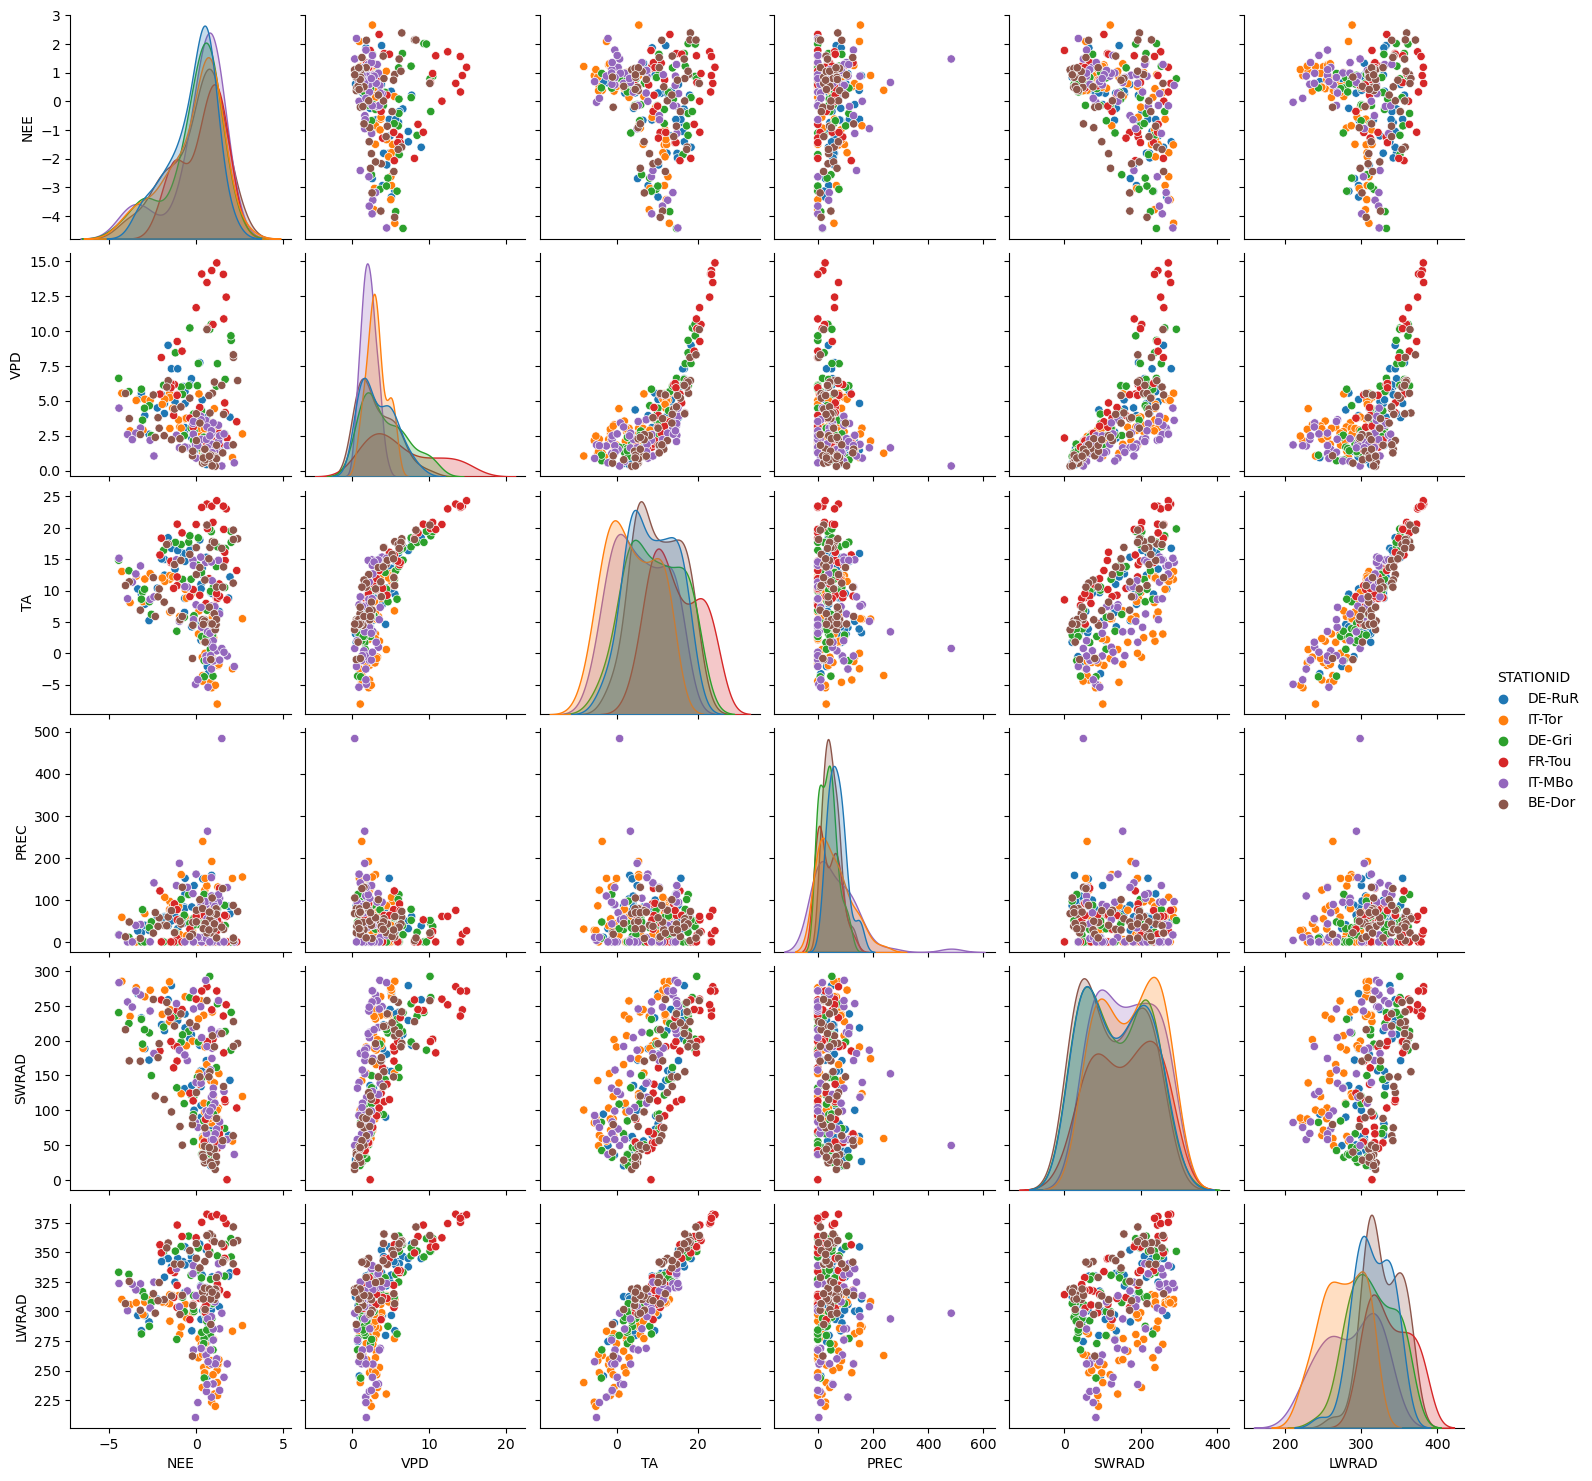

In [125]:
sns.pairplot(DF_monthly,hue='STATIONID')

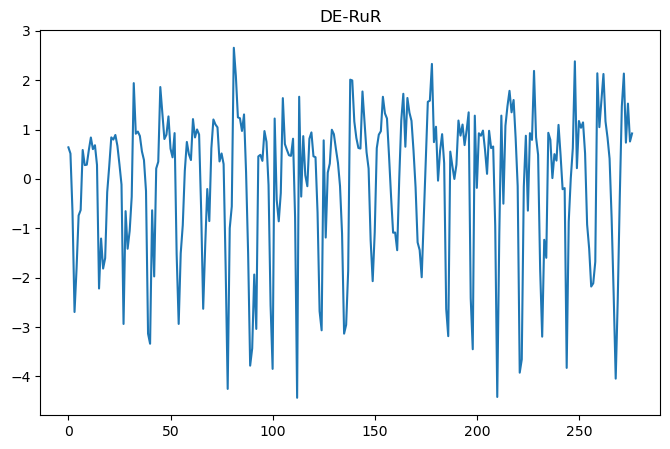

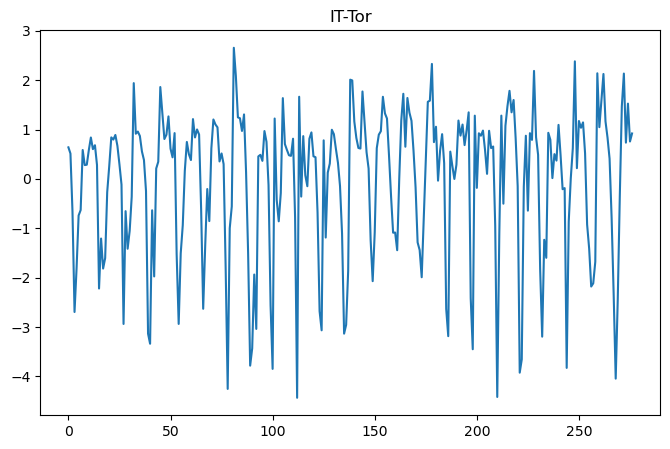

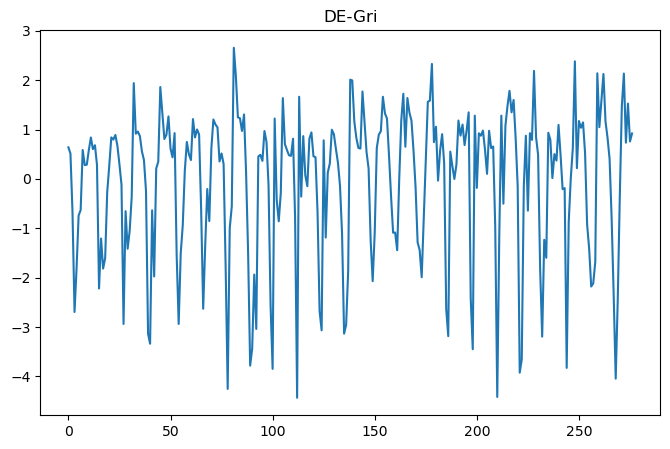

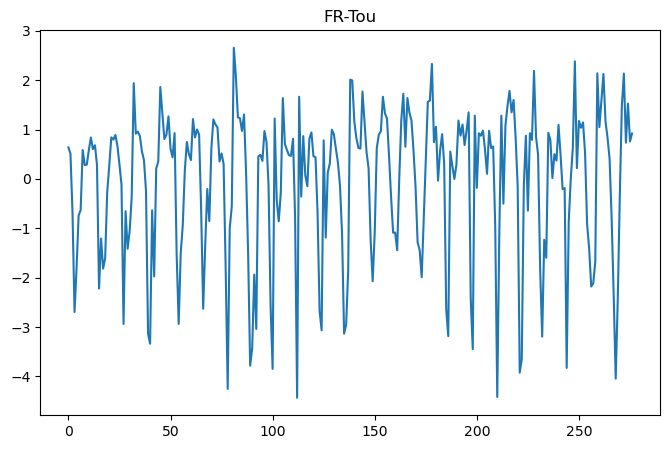

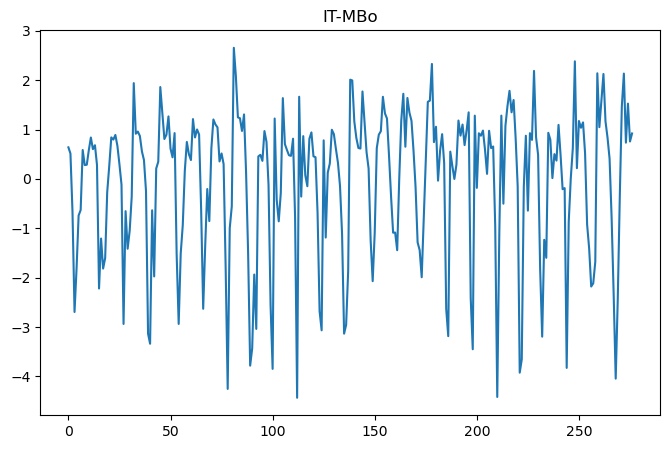

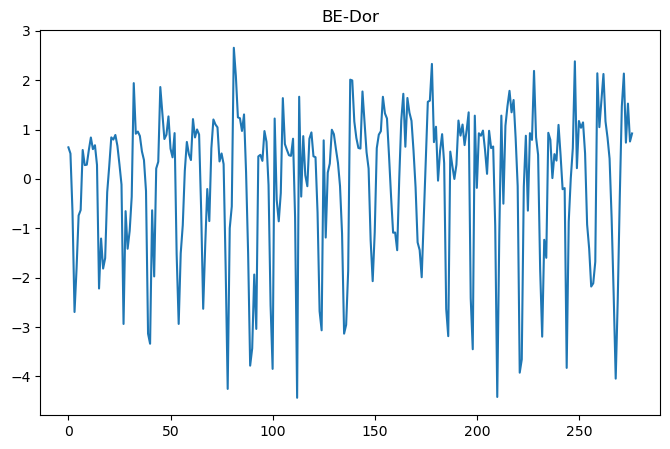

In [123]:
for i in range(len(list(set(DF_monthly.STATIONID)))):
    plt.figure(figsize=(8,5))
    plt.plot(DF_monthly.NEE)
    plt.title(list(set(DF_monthly.STATIONID))[i])
    plt.show()